# 2021/12/6
# 本代码绘制FIG7 降水的hov图
# famil的四个实验 gpcp 共5图

In [39]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import sys

sys.path.append("/home/sun/mycode/module/")
from module_sun import *

In [73]:
time_slice  =  slice(100,201)
lat_slice   =  slice(15,25)
lon_slice   =  slice(55,145)

# 模式实验结果
path            =  "/home/sun/qomo-data/zhuang_plev/"
f               =  xr.open_dataset(path+"famil_zhuang_con_prect.nc")
lat_slice   =  slice(10,25)
control_prect   =  xr.open_dataset(path+"famil_zhuang_con_prect.nc").sel(time=time_slice,lat = lat_slice,lon = lon_slice)
lat_slice   =  slice(15,25)
noic_prect      =  xr.open_dataset(path+"famil_zhuang_ic_prect.nc").sel(time=time_slice,lat = lat_slice,lon = lon_slice)
noid_prect      =  xr.open_dataset(path+"famil_zhuang_id_prect.nc").sel(time=time_slice,lat = lat_slice,lon = lon_slice)
noicid_prect    =  xr.open_dataset(path+"famil_zhuang_icid_prect.nc").sel(time=time_slice,lat = lat_slice,lon = lon_slice)

np.set_printoptions(suppress=True)
#Compute weights and take weighted average over latitude dimension
#weights      =  np.cos(np.deg2rad(noic_prect.lat.values))

#avg_control  =  (control_prect.prect*weights[None, :, None]).sum(dim='lat')/np.sum(weights)
#avg_noic     =  (noic_prect.prect*weights[None, :, None]).sum(dim='lat')/np.sum(weights)
#avg_noid     =  (noid_prect.prect*weights[None, :, None]).sum(dim='lat')/np.sum(weights)
#avg_noicid   =  (noicid_prect.prect*weights[None, :, None]).sum(dim='lat')/np.sum(weights)

# 观测结果
lat_slice   =  slice(10,25)
cesm_prect   =  xr.open_dataset("/home/sun/data/cesm_control_prect_365_climate.nc")
merra2_prect =  xr.open_dataset("/home/sun/data/merra2_prect_365_climate.nc")
gpcp_prect   =  xr.open_dataset("/home/sun/data/gpcp_prect_365_climate.nc")
trmm_prect   =  xr.open_dataset("/home/sun/data/trmm_prect_365_climate.nc")
prect1      =  cesm_prect["prect"].sel(time=time_slice,
                                       lat = lat_slice,
                                       lon = lon_slice)
prect2      =  merra2_prect["prect"].sel(time=time_slice,
                                       lat = lat_slice,
                                       lon = lon_slice)
prect3      =  gpcp_prect["prect"].sel(time=time_slice,
                                       lat = lat_slice,
                                       lon = lon_slice)
prect4      =  trmm_prect["prect"].sel(time=time_slice,
                                       lat = lat_slice,
                                       lon = lon_slice)

np.set_printoptions(suppress=True)
#Compute weights and take weighted average over latitude dimension
weights1  =  np.cos(np.deg2rad(prect1.lat.values))
weights2  =  np.cos(np.deg2rad(prect2.lat.values))
weights3  =  np.cos(np.deg2rad(prect3.lat.values))
weights4  =  np.cos(np.deg2rad(prect4.lat.values))
avg_prect1  =  (prect1*weights1[None, :, None]).sum(dim='lat')/np.sum(weights1)
avg_prect2  =  (prect2*weights2[None, :, None]).sum(dim='lat')/np.sum(weights2)
avg_prect3  =  (prect3*weights3[None, :, None]).sum(dim='lat')/np.sum(weights3)
avg_prect4  =  (prect4*weights4[None, None, :]).sum(dim='lat')/np.sum(weights4)

# 绘图

[Text(0, 100, '10Apr'),
 Text(0, 110, '20Apr'),
 Text(0, 120, '30Apr'),
 Text(0, 130, '10May'),
 Text(0, 140, '20May'),
 Text(0, 150, '30May'),
 Text(0, 161, '10Jun'),
 Text(0, 171, '20Jun'),
 Text(0, 181, '30Jun'),
 Text(0, 191, '10Jul'),
 Text(0, 201, '20Jul')]

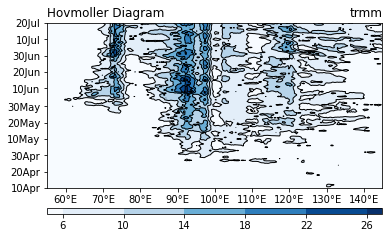

In [74]:
# Start figure
fig,ax2  =  plt.subplots()
# Use gridspec to help size elements of plot; small top plot and big bottom plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 6], hspace=0.01)

# Tick labels
x_tick_labels = []
for xx in range(60,141,10):
    x_tick_labels.append(u''+str(xx)+"\N{DEGREE SIGN}E")


# Set some titles
plt.title('Hovmoller Diagram', loc='left')
plt.title('trmm', loc='right')



# Plot of chosen variable averaged over latitude and slightly smoothed
clevs = np.arange(6,28,4)
cf   = ax2.contourf(prect4.lon.values, prect4.time.values, 1.05*avg_prect4, clevs, cmap='Blues', extend='both')
cs   = ax2.contour(prect4.lon.values,  prect4.time.values, 1.05*avg_prect4, clevs, colors='k', linewidths=1)
#cbar = fig.colorbar(cf, ax=ax2, orientation='horizontal', pad=0.09, aspect=50,extend='both')
#cbar.set_label('mm $day^{-1}$')
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.09, aspect=50, extendrect=True)

ax2.set_xticks(np.arange(60,141,10))
ax2.set_xticklabels(x_tick_labels)
ax2.tick_params(labelsize=10)

ax2.set_yticks(y_tick)
ax2.set_yticklabels(y_label)

[Text(0, 100, '10Apr'),
 Text(0, 110, '20Apr'),
 Text(0, 120, '30Apr'),
 Text(0, 130, '10May'),
 Text(0, 140, '20May'),
 Text(0, 150, '30May'),
 Text(0, 161, '10Jun'),
 Text(0, 171, '20Jun'),
 Text(0, 181, '30Jun'),
 Text(0, 191, '10Jul'),
 Text(0, 201, '20Jul')]

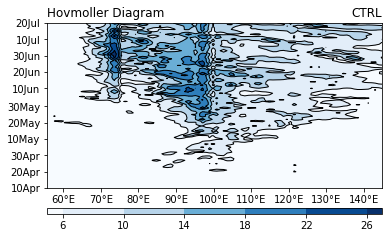

In [75]:
# Start figure
fig,ax2  =  plt.subplots()
# Use gridspec to help size elements of plot; small top plot and big bottom plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 6], hspace=0.01)

# Tick labels
x_tick_labels = []
for xx in range(60,141,10):
    x_tick_labels.append(u''+str(xx)+"\N{DEGREE SIGN}E")


# Set some titles
plt.title('Hovmoller Diagram', loc='left')
plt.title('CTRL', loc='right')



# Plot of chosen variable averaged over latitude and slightly smoothed
clevs = np.arange(6,28,4)
cf   = ax2.contourf(control_prect.lon.values, control_prect.time.values, 1.*avg_control, clevs, cmap='Blues', extend='both')
cs   = ax2.contour(control_prect.lon.values,  control_prect.time.values, 1.*avg_control, clevs, colors='k', linewidths=1)
#cbar = fig.colorbar(cf, ax=ax2, orientation='horizontal', pad=0.09, aspect=50,extend='both')
#cbar.set_label('mm $day^{-1}$')
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.09, aspect=50, extendrect=True)

ax2.set_xticks(np.arange(60,141,10))
ax2.set_xticklabels(x_tick_labels)
ax2.tick_params(labelsize=10)

ax2.set_yticks(y_tick)
ax2.set_yticklabels(y_label)

[Text(0, 100, '10Apr'),
 Text(0, 110, '20Apr'),
 Text(0, 120, '30Apr'),
 Text(0, 130, '10May'),
 Text(0, 140, '20May'),
 Text(0, 150, '30May'),
 Text(0, 161, '10Jun'),
 Text(0, 171, '20Jun'),
 Text(0, 181, '30Jun'),
 Text(0, 191, '10Jul'),
 Text(0, 201, '20Jul')]

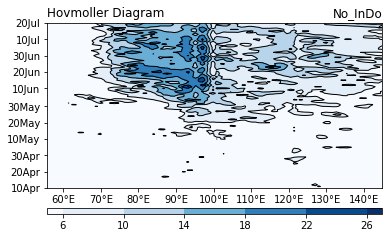

In [76]:
# Start figure
fig,ax2  =  plt.subplots()
# Use gridspec to help size elements of plot; small top plot and big bottom plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 6], hspace=0.01)

# Tick labels
x_tick_labels = []
for xx in range(60,141,10):
    x_tick_labels.append(u''+str(xx)+"\N{DEGREE SIGN}E")


# Set some titles
plt.title('Hovmoller Diagram', loc='left')
plt.title('No_InDo', loc='right')



# Plot of chosen variable averaged over latitude and slightly smoothed
clevs = np.arange(6,28,4)
cf   = ax2.contourf(control_prect.lon.values, noid_prect.time.values, 0.9*avg_noid, clevs, cmap='Blues', extend='both')
cs   = ax2.contour(control_prect.lon.values,  noid_prect.time.values, 0.9*avg_noid, clevs, colors='k', linewidths=1)
#cbar = fig.colorbar(cf, ax=ax2, orientation='horizontal', pad=0.09, aspect=50,extend='both')
#cbar.set_label('mm $day^{-1}$')
cbar = plt.colorbar(cf, orientation='horizontal', pad=0.09, aspect=50, extendrect=True)

ax2.set_xticks(np.arange(60,141,10))
ax2.set_xticklabels(x_tick_labels)
ax2.tick_params(labelsize=10)

ax2.set_yticks(y_tick)
ax2.set_yticklabels(y_label)

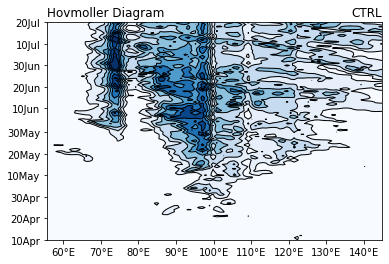

In [8]:
# Start figure
fig,ax2  =  plt.subplots()
# Use gridspec to help size elements of plot; small top plot and big bottom plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 6], hspace=0.01)

# Tick labels
x_tick_labels = []
for xx in range(60,141,10):
    x_tick_labels.append(u''+str(xx)+"\N{DEGREE SIGN}E")


# Set some titles
plt.title('Hovmoller Diagram', loc='left')
plt.title('CTRL', loc='right')



# Plot of chosen variable averaged over latitude and slightly smoothed
clevs = np.linspace(7.2,21.6,7)/24
cf   = ax2.contourf(control_prect.lon.values, control_prect.time.values, avg_control/24, clevs, cmap='Blues', extend='both')
cs   = ax2.contour(control_prect.lon.values,  control_prect.time.values, avg_control/24, clevs, colors='k', linewidths=1)
#cbar = fig.colorbar(cf, ax=ax2, orientation='horizontal', pad=0.09, aspect=50,extend='both')
#cbar.set_label('mm $day^{-1}$')

ax2.set_xticks(np.arange(60,141,10))
ax2.set_xticklabels(x_tick_labels)
ax2.tick_params(labelsize=10)

ax2.set_yticks(y_tick)
ax2.set_yticklabels(y_label)

#plt.savefig("/home/sun/paint/lunwen/famil_con_prect_hov.pdf",dpi=600)
#plt.show()